In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

En este apartado se realizara un análisis exploratorio de datos (EDA) siguiendo la rúbrica proporcionada

1. Accesos_tecnologia_localidad

In [3]:
# Importar el csv
acc_tecnol_local = pd.read_csv('Dataset_procesados/Accesos_tecnologia_localidades.csv')

In [4]:
#Verificar informacion del dataset
print(acc_tecnol_local.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3073 non-null   object
 1   Partido        3073 non-null   object
 2   Localidad      3073 non-null   object
 3   Link Indec     3073 non-null   int64 
 4   ADSL           3073 non-null   int64 
 5   CABLEMODEM     3073 non-null   int64 
 6   DIAL UP        3073 non-null   int64 
 7   FIBRA OPTICA   3073 non-null   int64 
 8   OTROS          3073 non-null   int64 
 9   SATELITAL      3073 non-null   int64 
 10  WIMAX          3073 non-null   int64 
 11  WIRELESS       3073 non-null   int64 
 12  Total general  3073 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 312.2+ KB
None


Se puede observar que este dataframe tiene datos de 3073 localidades o registros únicos con 13 columnas en total. ste DataFrame parece contener datos sobre la disponibilidad de diferentes tipos de tecnologías de acceso a internet en diversas localidades (provincia, partido, localidad). Cada tipo de acceso a internet (ADSL, CABLEMODEM, FIBRA ÓPTICA, etc.) está cuantificado por el número de conexiones en cada localidad. La columna Total general probablemente sea la suma de todas las conexiones de diferentes tipos para cada localidad.

In [5]:
print(acc_tecnol_local.describe())

         Link Indec          ADSL    CABLEMODEM      DIAL UP   FIBRA OPTICA  \
count  3.073000e+03   3073.000000  3.073000e+03  3073.000000    3073.000000   
mean   3.866032e+07    252.025708  1.948245e+03     3.837618    1306.573706   
std    2.995468e+07   1617.529277  2.277762e+04    43.174730    8893.212793   
min    0.000000e+00      0.000000  0.000000e+00     0.000000       0.000000   
25%    6.882040e+06      0.000000  0.000000e+00     0.000000       0.000000   
50%    3.009807e+07      0.000000  0.000000e+00     0.000000       1.000000   
75%    6.611902e+07     64.000000  8.000000e+00     0.000000     160.000000   
max    9.401402e+07  70108.000000  1.177475e+06  2050.000000  281390.000000   

              OTROS    SATELITAL        WIMAX      WIRELESS  Total general  
count   3073.000000  3073.000000  3073.000000   3073.000000   3.073000e+03  
mean      78.434754     0.953466     0.712008    194.820046   3.785602e+03  
std     1057.638880    13.608724    15.100382    750.9555

Nos muestra:

Distribución de Datos: La mayoría de los valores de acceso en diferentes tecnologías y rangos de velocidad están concentrados cerca de 0, lo que sugiere que en muchas localidades hay pocos o ningún acceso en ciertos rangos o tecnologías.

Desviación Estándar Alta: En columnas como "CABLEMODEM" o "1 Mbps", la desviación estándar alta indica que hay localidades con un número significativamente mayor de accesos que otras.

Outliers Potenciales: Los valores máximos en varias columnas son mucho más grandes que la media, lo que sugiere la presencia de valores atípicos o outliers. Por ejemplo, en "700 Mbps", el máximo es 68405, mientras que la media es solo 0.001305, lo que sugiere que una localidad tiene un número extremadamente alto de accesos en este rango de velocidad.


Gráfico de barras: Para cada columna categórica (Provincia, Partido, Localidad), muestra la frecuencia de cada categoría.

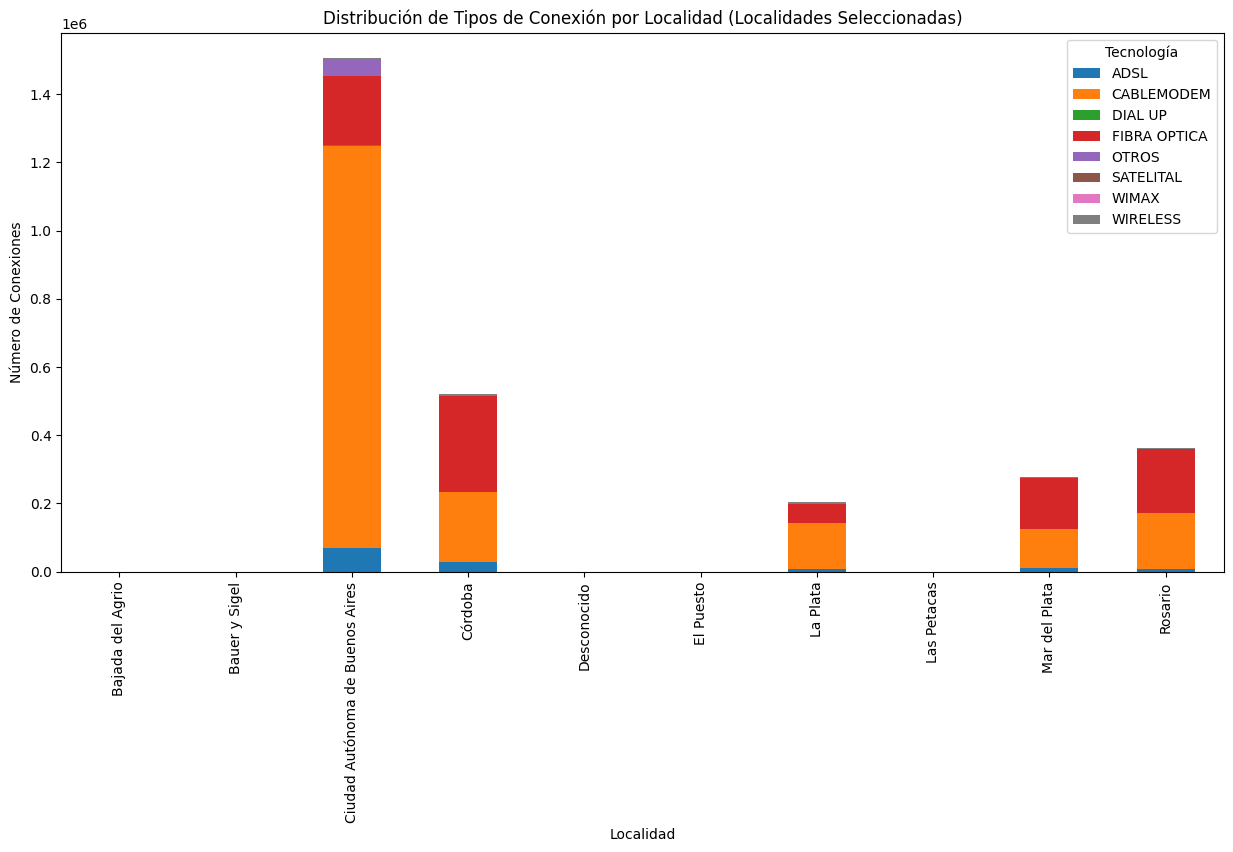

In [6]:
# Crear un DataFrame con las tecnologías de acceso a Internet
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']


# Filtrar el DataFrame para seleccionar las localidades con mayores y menores conexiones totales
acc_tecnol_local['TotalConexiones'] = acc_tecnol_local[tecnologias].sum(axis=1)
localidades_mayores = acc_tecnol_local.groupby('Localidad')['TotalConexiones'].sum().nlargest(5).index
localidades_menores = acc_tecnol_local.groupby('Localidad')['TotalConexiones'].sum().nsmallest(5).index

# Crear un DataFrame con solo las localidades seleccionadas
df_filtrado = acc_tecnol_local[acc_tecnol_local['Localidad'].isin(localidades_mayores) | acc_tecnol_local['Localidad'].isin(localidades_menores)]

# Agrupar por localidad y sumar las conexiones por tecnología
df_tecnologias_filtrado = df_filtrado.groupby('Localidad')[tecnologias].sum()

# Crear el gráfico de barras apiladas
df_tecnologias_filtrado.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribución de Tipos de Conexión por Localidad (Localidades Seleccionadas)')
plt.xlabel('Localidad')
plt.ylabel('Número de Conexiones')
plt.legend(title='Tecnología')
plt.show()



Predominio de Conexiones por Tecnología:
En la localidad de Ciudad Autónoma de Buenos Aires (CABA), las conexiones por CABLEMODEM son claramente predominantes, representando una gran parte de todas las conexiones.
En localidades como Rosario y Mar del Plata, también se observa un número significativo de conexiones por CABLEMODEM, seguido de FIBRA ÓPTICA y otras tecnologías.
Diversidad de Tecnologías:
Se puede notar que en localidades como Córdoba, Rosario, y Mar del Plata hay una mayor diversidad en el uso de tecnologías, con conexiones repartidas entre CABLEMODEM, FIBRA ÓPTICA, ADSL, y otras.
En contraste, en localidades más pequeñas o con menos datos, como Bajada del Agrio, Bauer y Sigel, y Las Petacas, las conexiones son menos numerosas y están distribuidas en pocas tecnologías, principalmente CABLEMODEM y ADSL.


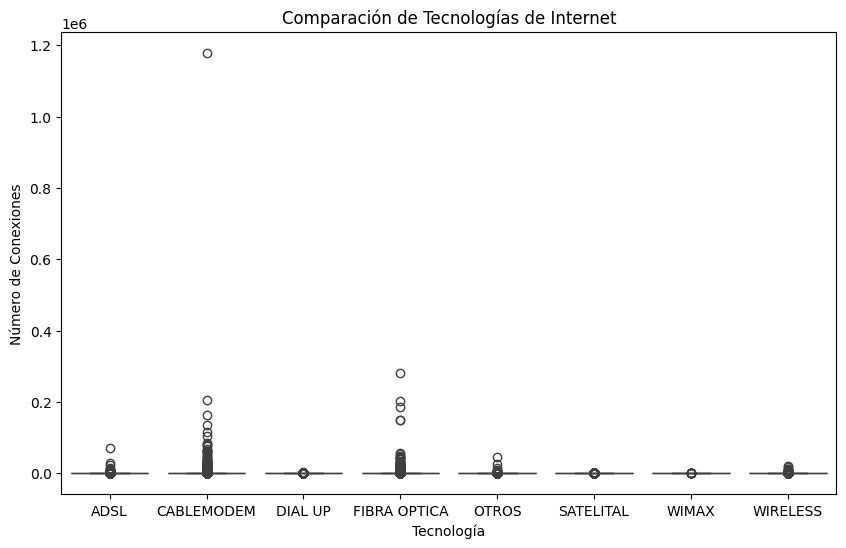

In [7]:
# Melt the DataFrame to have a long format DataFrame for easier plotting
df_melted = acc_tecnol_local.melt(id_vars=['Provincia', 'Partido', 'Localidad'], value_vars=tecnologias, var_name='Tecnologia', value_name='Conexiones')

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tecnologia', y='Conexiones', data=df_melted)
plt.title('Comparación de Tecnologías de Internet')
plt.xlabel('Tecnología')
plt.ylabel('Número de Conexiones')
plt.show()


Este análisis sugiere que, aunque existen tecnologías de Internet más tradicionales como ADSL y CABLEMODEM, la Fibra Óptica está ganando terreno, reflejando una tendencia hacia la modernización de la infraestructura de Internet en las provincias. Las diferencias en la distribución de conexiones entre tecnologías también podrían indicar variaciones en la infraestructura tecnológica y el acceso a Internet entre las diferentes regiones.

Valores Atípicos (Puntos Fuera de los Bigotes):

Varios de los boxplots, como los de ADSL, FIBRA OPTICA, y CABLEMODEM, muestran valores atípicos (outliers), lo que sugiere que en algunas provincias hay un número de conexiones significativamente diferente (mucho mayor) al de otras.
Estos outliers podrían indicar provincias con una infraestructura más desarrollada o áreas urbanas con una alta concentración de conexiones.

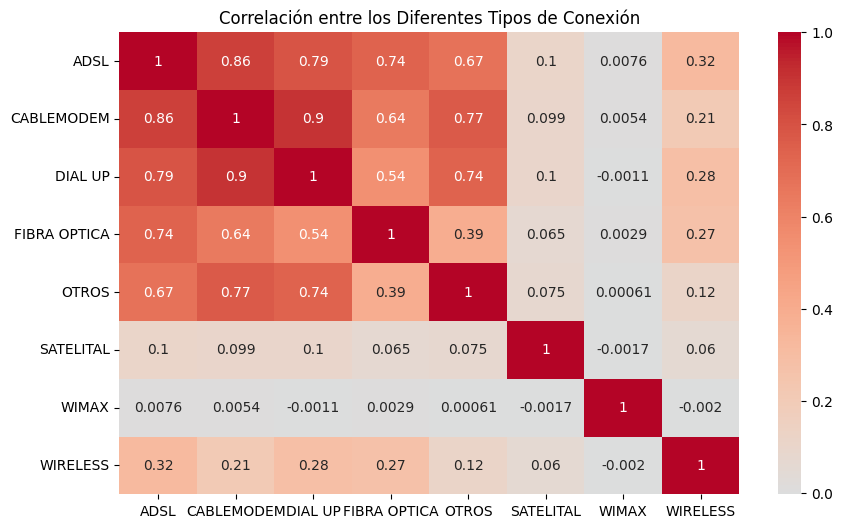

In [8]:
# Suponiendo que ya tienes el DataFrame cargado en df
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Paso 2: Calcular la Matriz de Correlación
corr_matrix = acc_tecnol_local[tecnologias].corr()

# Paso 3: Crear el Heatmap de Correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre los Diferentes Tipos de Conexión')
plt.show()


Existen correlaciones moderadas a fuertes entre varios tipos de conexión, particularmente entre ADSL, CABLEMODEM, y DIAL UP.
Las conexiones como SATELITAL, WIMAX, y WIRELESS tienen una correlación mucho más baja con las demás, sugiriendo que su uso puede ser más independiente de otras formas de conexión.


Por Provincia:
2. Accesos por velocidad

In [10]:
# Importar el csv
accesos_por_velocidad = pd.read_csv('Dataset_procesados/Accesos_velocidad_Provincia.csv')

In [11]:
#Verificar informacion del dataset
print(accesos_por_velocidad.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                984 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB
None


Este dataset posee 984 filas y un total de 12 columnas

Datos Completos: No hay valores nulos en el dataset, lo que es positivo para el análisis ya que no se requiere imputación de datos o eliminación de filas/columnas con valores faltantes.

Los tipos de datos parecen estar bien definidos para cada columna, con las columnas numéricas en float64 o int64, y la columna de texto en object. El dataset está bien estructurado y listo para análisis posteriores, como la generación de estadísticas descriptivas, visualización de datos, o la construcción de modelos predictivos.

In [12]:
accesos_por_velocidad.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000,984.000000,984.000000,9.840000e+02,984.000000,9.840000e+02
mean,2018.658537,2.463415,1967.099593,9134.977642,1.347227e+05,38149.252033,37076.536585,20064.129065,1.157046e+05,6229.712398,3.630490e+05
std,3.002418,1.128870,12757.059460,20796.531611,3.245957e+05,64289.080670,88748.124134,69777.001896,4.502564e+05,14885.990695,7.810485e+05
min,2014.000000,1.000000,6.000000,0.000000,1.336000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,41.000000,384.750000,2.417200e+04,3662.500000,2336.250000,40.000000,1.175000e+01,0.000000,6.082625e+04
50%,2019.000000,2.000000,107.000000,2217.500000,4.285500e+04,13040.500000,10115.500000,1559.820000,3.272500e+03,114.500000,1.109070e+05
75%,2021.000000,3.000000,467.250000,6946.750000,8.389625e+04,41836.750000,26436.000000,9996.250000,3.894525e+04,6507.750000,1.921040e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125147.000000,5.044557e+06



Los datos cubren desde 2014 hasta 2024, con una mayor concentración en años más recientes.
Distribución de las Conexiones:

Hay una gran variabilidad en los datos para cada tipo de conexión. La categoría + 1 Mbps - 6 Mbps tiene el promedio más alto, indicando que es la más común o significativa en los datos.
La categoría OTROS tiene un rango muy amplio y una desviación estándar alta, lo que sugiere que podría haber una gran diversidad en los tipos de conexiones no categorizadas.
Valores Atípicos:

Los valores máximos y mínimos varían ampliamente, especialmente en las categorías con conexiones de alta velocidad (+ 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps). Esto indica la presencia de valores atípicos o registros extremos en estas categorías.

 Distribución de la Velocidad de Internet

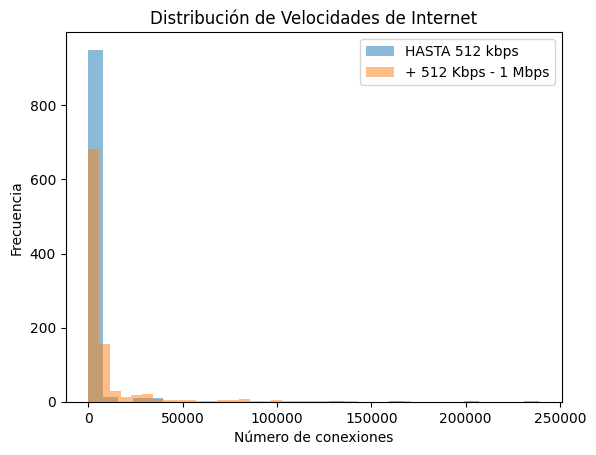

In [13]:

plt.hist(accesos_por_velocidad['HASTA 512 kbps'], bins=30, alpha=0.5, label='HASTA 512 kbps')
plt.hist(accesos_por_velocidad['+ 512 Kbps - 1 Mbps'], bins=30, alpha=0.5, label='+ 512 Kbps - 1 Mbps')
plt.xlabel('Número de conexiones')
plt.ylabel('Frecuencia')
plt.title('Distribución de Velocidades de Internet')
plt.legend(loc='upper right')
plt.show()


Se observa que la  mayoría de las conexiones de Internet tienen una velocidad de HASTA 512 kbps.
Las conexiones en la categoría + 512 Kbps - 1 Mbps son menos frecuentes en comparación.
Hay una alta concentración de datos en la categoría de velocidad más baja o en 0, lo que puede reflejar limitaciones en la infraestructura de red o la disponibilidad de conexiones más rápidas en la región representada por los datos.

Tendencias Temporales

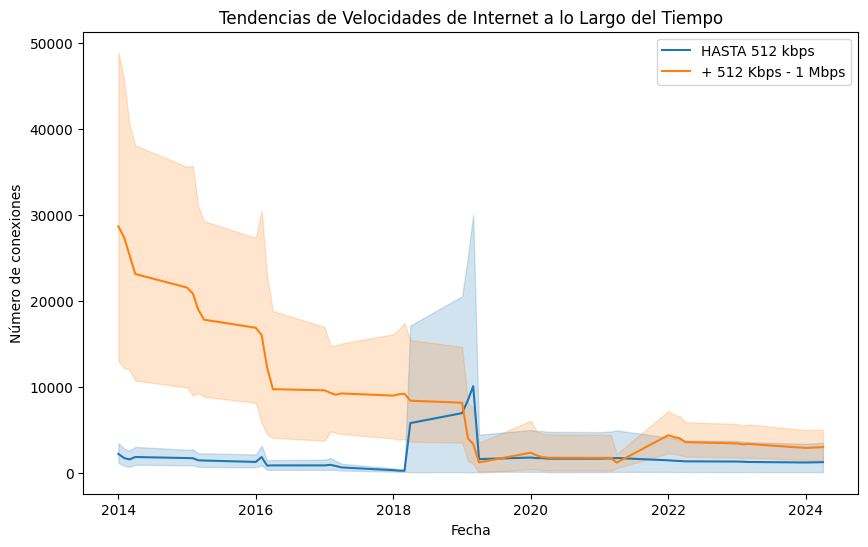

In [25]:

accesos_por_velocidad['Fecha'] = accesos_por_velocidad['Año'].astype(str) + '-' + accesos_por_velocidad['Trimestre'].astype(str)
accesos_por_velocidad['Fecha'] = pd.to_datetime(accesos_por_velocidad['Fecha'] + '-1', format='%Y-%m-%d')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Fecha', y='HASTA 512 kbps', data=accesos_por_velocidad, label='HASTA 512 kbps')
sns.lineplot(x='Fecha', y='+ 512 Kbps - 1 Mbps', data=accesos_por_velocidad, label='+ 512 Kbps - 1 Mbps')
# Agregar más líneas según sea necesario
plt.xlabel('Fecha')
plt.ylabel('Número de conexiones')
plt.title('Tendencias de Velocidades de Internet a lo Largo del Tiempo')
plt.legend()
plt.show()


Disminución en HASTA 512 kbps:
La ligera disminución en el número de conexiones de hasta 512 kbps podría indicar una transición hacia velocidades de conexión más altas o una menor demanda de conexiones en esta categoría específica. Esto podría ser un indicativo de una evolución en las preferencias de los usuarios hacia opciones de mayor velocidad.

Aumento en + 512 Kbps - 1 Mbps:
El aumento en el número de conexiones en la categoría de +512 kbps a 1 Mbps sugiere que esta velocidad está ganando popularidad. Esto puede ser debido a una mayor disponibilidad de estos planes, una mejor cobertura, o una mayor demanda de velocidades que superan los 512 kbps.


Análisis de Tendencias en Outliers

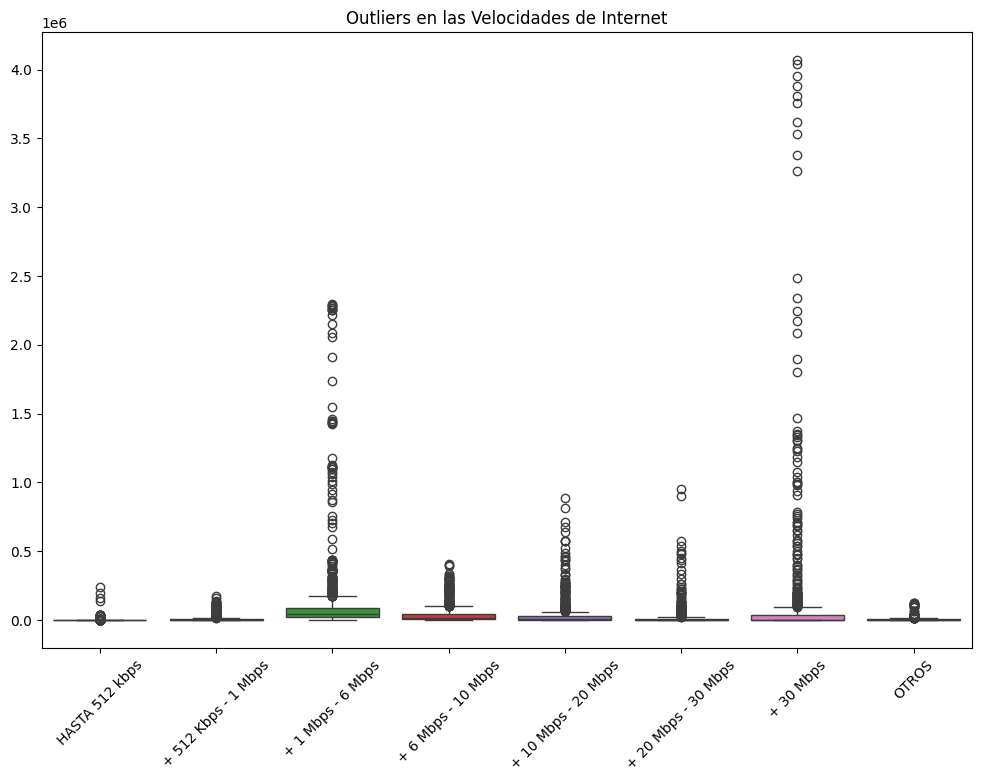

In [27]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=accesos_por_velocidad[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']])
plt.xticks(rotation=45)
plt.title('Outliers en las Velocidades de Internet')
plt.show()

Los datos presentan una amplia gama de valores en diferentes categorías, lo que indica una gran variabilidad en las métricas recopiladas.
Se identificaron outliers significativos en todas las categorías "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", y "+ 10 Mbps - 20 Mbps" y muchos en + 30Mbps

Dado que los datos provienen de una fuente específica (Novacon), es importante considerar si estos outliers representan casos reales o errores en la recolección de datos. Se podria Considerar la posibilidad de agrupar o segmentar los datos para un análisis más detallado, en lugar de eliminar los outliers.

Relación entre Variables

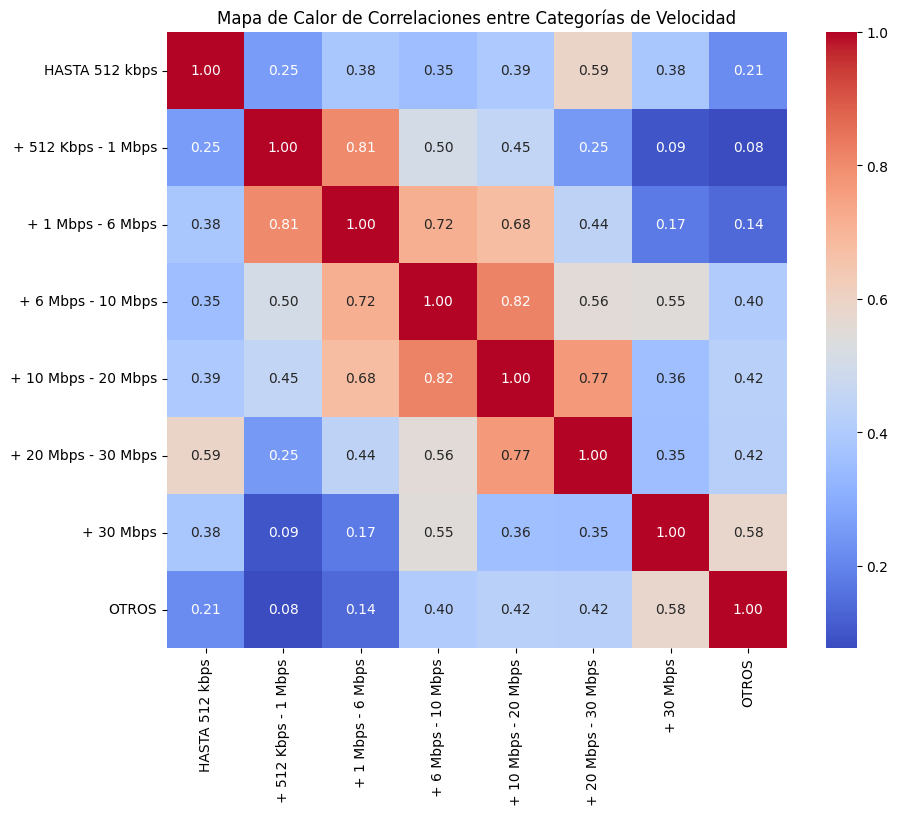

In [29]:

corr = accesos_por_velocidad[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones entre Categorías de Velocidad')
plt.show()

Relaciones Fuertes:

Entre las categorías de velocidad: Hay una fuerte correlación positiva entre las categorías de velocidad más altas. Por ejemplo, + 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps tienen una correlación de 0.72, y + 10 Mbps - 20 Mbps y + 6 Mbps - 10 Mbps tienen una correlación de 0.82. Esto sugiere que a medida que aumentan las velocidades de acceso, hay una tendencia a tener valores altos en categorías vecinas.

Por Provincia:
3. Accesos Por Tecnología

In [31]:
# Importar las hoja Acc_vel_loc_sinrangos
acc_vel_tecnologia = pd.read_csv('Dataset_procesados/Accesos_Tecnología_Provincia.csv')

In [32]:
#Verificar informacion del dataset
print(acc_vel_tecnologia.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      984 non-null    float64
 1   Trimestre                984 non-null    float64
 2   Provincia                985 non-null    object 
 3   ADSL                     985 non-null    float64
 4   Cablemodem               985 non-null    float64
 5   Fibra óptica             985 non-null    float64
 6   Wireless                 985 non-null    float64
 7   Otros                    985 non-null    float64
 8   Total                    985 non-null    float64
 9   Año_inconsistente        72 non-null     float64
 10  Trimestre_inconsistente  72 non-null     float64
dtypes: float64(10), object(1)
memory usage: 84.8+ KB
None


Este dataset posee: 
Número de Entradas: 985  /  Número de Columnas: 11
Tipos de Datos:
float64: 10 columnas (incluyendo Año, Trimestre, y diferentes tecnologías de acceso como ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, y las columnas relacionadas con inconsistencias).
object: 1 columna (Provincia).

Columnas con Datos Faltantes:
Año_inconsistente: 72 valores no nulos.
Trimestre_inconsistente: 72 valores no nulos.
Todas las demás columnas tienen datos completos.

In [17]:
print(acc_vel_tecnologia.describe()) 

               Año   Trimestre          ADSL    Cablemodem  Fibra óptica  \
count   984.000000  984.000000  9.850000e+02  9.850000e+02  9.850000e+02   
mean   2018.634146    2.463415  1.149149e+05  1.831031e+05  4.723446e+04   
std       2.962686    1.128870  2.385058e+05  4.498495e+05  1.761965e+05   
min    2014.000000    1.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2016.000000    1.000000  2.073400e+04  1.085600e+04  3.540000e+02   
50%    2019.000000    2.000000  4.433200e+04  4.014200e+04  2.581000e+03   
75%    2021.000000    3.000000  9.147400e+04  7.581500e+04  2.544500e+04   
max    2024.000000    4.000000  1.586343e+06  2.797700e+06  1.799013e+06   

            Wireless          Otros         Total  Año_inconsistente  \
count     985.000000     985.000000  9.850000e+02               72.0   
mean    12372.708629    6550.109645  3.641753e+05             2019.0   
std     20989.264861   11563.929819  7.844143e+05                0.0   
min         0.000000       

Variabilidad Alta: Hay una alta variabilidad en las columnas relacionadas con el número de accesos (ADSL, Cablemodem, Fibra óptica), lo que sugiere que algunas provincias tienen un acceso mucho mayor que otras.
Medias y Valores Extremos: Las medias para ADSL, Cablemodem, y Fibra óptica están bastante influenciadas por valores extremos. La columna Total también muestra gran variabilidad.
Concentración de Datos: Wireless y Otros tienen valores medios y desviaciones estándar menores, indicando menor variabilidad comparada con las otras tecnologías.

Distribución de Tipos de Acceso
Gráfico de barras apiladas:

Objetivo: Ver la distribución de cada tipo de acceso (ADSL, Cablemodem, Fibra óptica, Wireless, Otros) a nivel general.

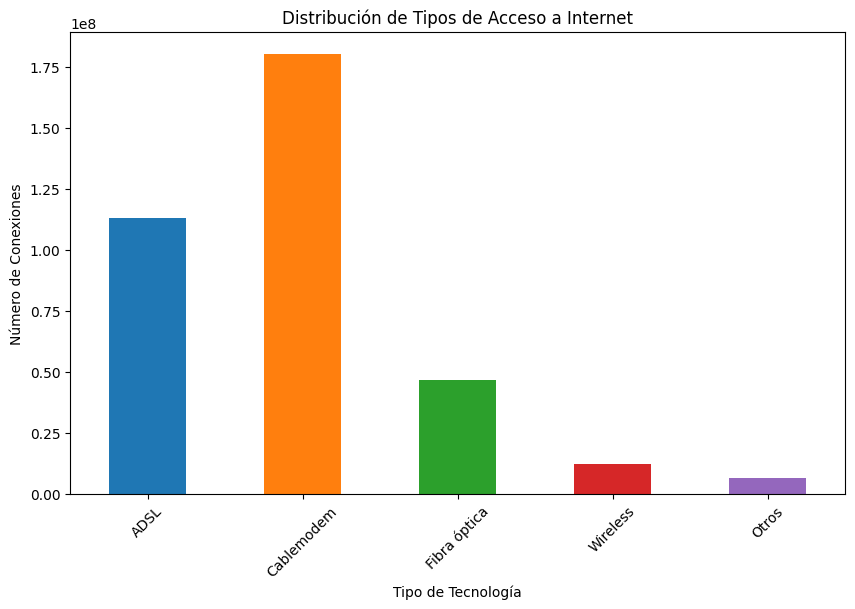

In [33]:

# Sumar el total por tecnología
tecnologia_totales = acc_vel_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear gráfico de barras
tecnologia_totales.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('Tipo de Tecnología')
plt.ylabel('Número de Conexiones')
plt.title('Distribución de Tipos de Acceso a Internet')
plt.xticks(rotation=45)
plt.show()


El gráfico de barras apiladas muestra la distribución de diferentes tipos de acceso a internet. Cablemodem destaca como el tipo de conexión con el mayor número de accesos, superando las 1.75 millones de conexiones en varias provincias. Le sigue ADSL, que aunque presenta un número significativo de conexiones, es menor en comparación con Cablemodem. Otras tecnologías como Fibra Óptica y Wireless tienen una presencia menor pero aún relevante, indicando una diversificación en las opciones de acceso a internet en distintas regiones

Comparación Regional de Tecnologías

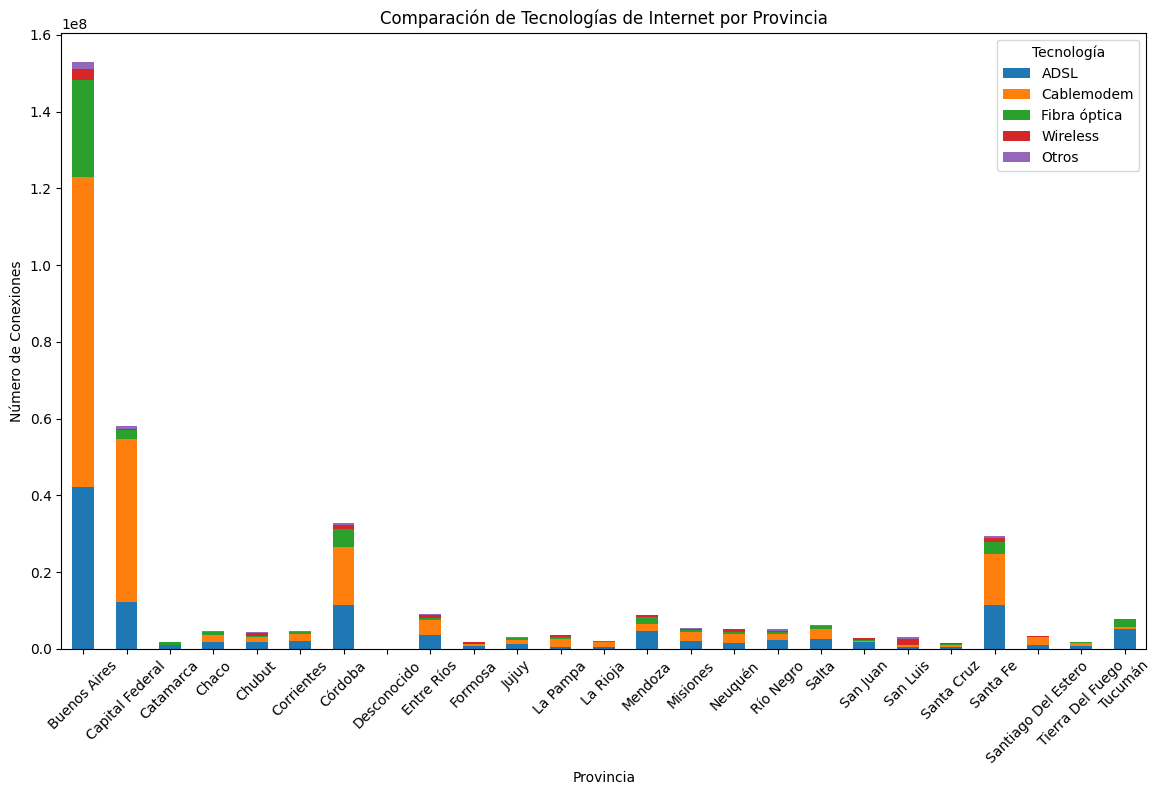

In [42]:
df_provincia = acc_vel_tecnologia.groupby('Provincia').sum()

df_provincia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Provincia')
plt.ylabel('Número de Conexiones')
plt.title('Comparación de Tecnologías de Internet por Provincia')
plt.xticks(rotation=45)
plt.legend(title='Tecnología')
plt.show()


El gráfico de barras apiladas revela que la Provincia de Buenos Aires domina ampliamente en cuanto al número total de conexiones a internet, seguida por Capital Federal y Córdoba. Buenos Aires presenta una combinación significativa de tecnologías, con Cablemodem y ADSL como las más predominantes

Proporción de Tecnologías por una Provincia en particular

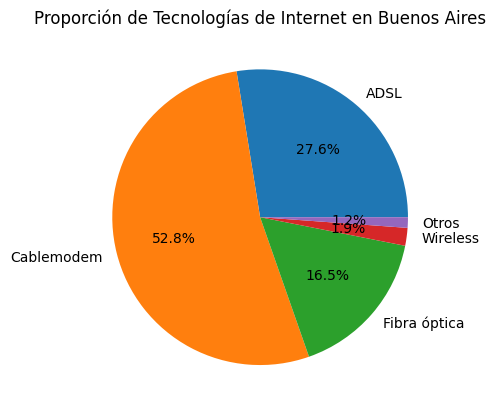

In [43]:
provincia = 'Buenos Aires'  # Cambia por la provincia que te interese
df_provincia = acc_vel_tecnologia[acc_vel_tecnologia['Provincia'] == provincia]

total_tecnologias = df_provincia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

plt.pie(total_tecnologias, labels=total_tecnologias.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title(f'Proporción de Tecnologías de Internet en {provincia}')
plt.show()


El gráfico de proporción de tecnologías de internet en la Provincia de Buenos Aires muestra que la tecnología Cablemodem es la más utilizada, representando un 52.8% del total de conexiones. Le sigue ADSL con un 27.6%, mientras que la Fibra Óptica representa un 16.5%. Estas cifras destacan la predominancia de tecnologías más tradicionales, como Cablemodem y ADSL, aunque la Fibra Óptica está ganando terreno como una opción moderna y de mayor velocidad.

Análisis de Outliers

In [44]:
# Función para identificar outliers usando IQR
def find_outliers_iqr(df):
    outliers_dict = {}
    for col in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers
    
    return outliers_dict

# Obtener outliers
outliers_iqr = find_outliers_iqr(acc_vel_tecnologia)

# Mostrar resultados
for tech, outliers in outliers_iqr.items():
    print(f"Outliers en {tech}:")
    print(outliers)

Outliers en ADSL:
        Año  Trimestre        Provincia       ADSL  Cablemodem  Fibra óptica  \
0    2024.0        1.0     Buenos Aires   203297.0   2790663.0     1799013.0   
24   2023.0        4.0     Buenos Aires   223391.0   2797700.0     1784593.0   
48   2023.0        3.0     Buenos Aires   237705.0   2784175.0     1740239.0   
72   2023.0        2.0     Buenos Aires   265537.0   2766463.0     1645945.0   
96   2023.0        1.0     Buenos Aires   304583.0   2761043.0     1551074.0   
..      ...        ...              ...        ...         ...           ...   
956  2014.0        2.0         Santa Fe   324101.0    178495.0        3085.0   
960  2014.0        1.0     Buenos Aires  1567685.0   1000879.0      120960.0   
961  2014.0        1.0  Capital Federal   445569.0    820161.0       17767.0   
965  2014.0        1.0          Córdoba   336841.0    225769.0         347.0   
980  2014.0        1.0         Santa Fe   322662.0    174296.0        3059.0   

     Wireless     Otr

Valores Extremos: Los outliers en la columna ADSL tienen valores notablemente más altos que el resto de los datos. Por ejemplo, los valores de ADSL como 1,567,685 en Buenos Aires y 445,569 en Capital Federal son considerablemente mayores en comparación con otros registros.
Distribución Geográfica: Los outliers se encuentran en varias provincias, pero algunos lugares como Buenos Aires y Santa Fe tienen varios registros atípicos. Esto podría indicar una alta demanda o un error en la recopilación de datos.

2. Temporalidad
Fechas Recurrentes: Los outliers parecen estar concentrados en ciertos años y trimestres, como 2014, lo que podría sugerir un evento o una anomalía en esos períodos. Este patrón debe ser revisado para entender si hay un factor específico que causó estos valores extremos.

3. Comparación con Otros Servicios
Discrepancias en Servicios: Los valores altos en ADSL a menudo coinciden con valores elevados en otras categorías como Cablemodem y Fibra óptica. Esto puede indicar que los outliers no son errores aislados sino que están relacionados con una alta demanda en general.

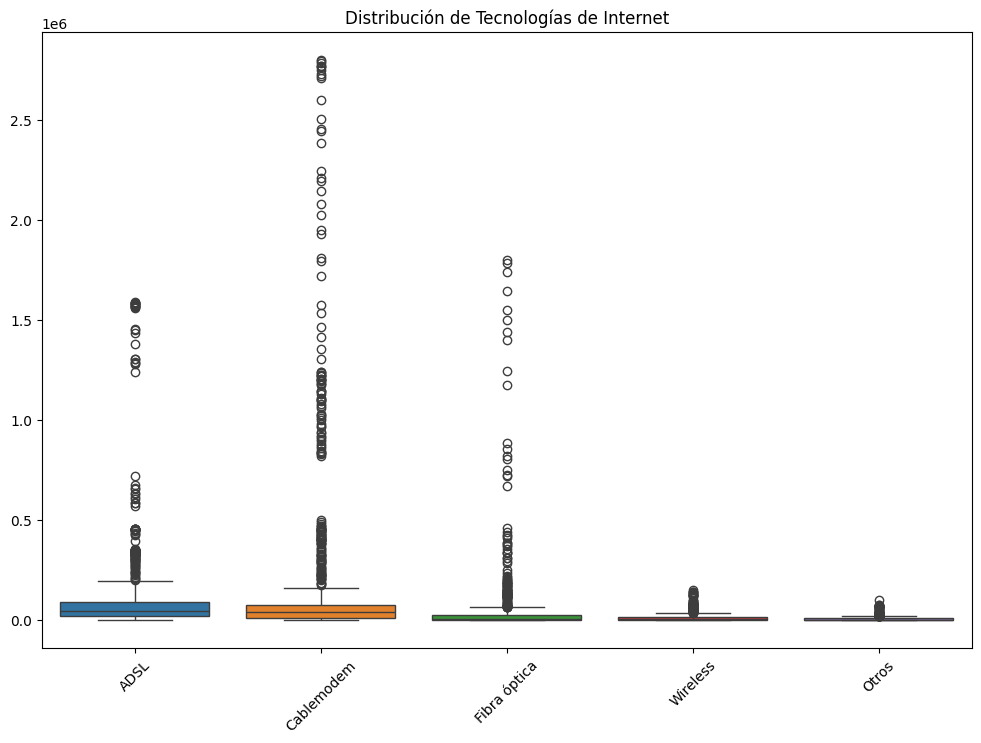

In [45]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=acc_vel_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']])
plt.xticks(rotation=45)
plt.title('Distribución de Tecnologías de Internet')
plt.show()


In [46]:
# Verifica que las columnas existan y que no haya valores inesperados
print(acc_vel_tecnologia.columns)
print(acc_vel_tecnologia[['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].head())


Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total', 'Año_inconsistente',
       'Trimestre_inconsistente', 'Fecha'],
      dtype='object')
      Año  Trimestre      ADSL  Cablemodem  Fibra óptica  Wireless     Otros
0  2024.0        1.0  203297.0   2790663.0     1799013.0  150290.0  101294.0
1  2024.0        1.0   70108.0   1177475.0      203756.0    4493.0   48879.0
2  2024.0        1.0    5901.0     11025.0       56542.0    1384.0      81.0
3  2024.0        1.0   11343.0     58929.0       64463.0    8404.0   12404.0
4  2024.0        1.0   26306.0     77217.0       26356.0   30867.0    9930.0


4. Penetración-hogares

In [55]:
# Importar el csv
hogares = pd.read_csv('Dataset_procesados/Penetracion_hogares.csv')

In [56]:
print(hogares.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB
None


In [57]:
print(hogares.describe())

               Año   Trimestre  Accesos por cada 100 hogares
count   984.000000  984.000000                    984.000000
mean   2018.634146    2.463415                     52.159634
std       2.962686    1.128870                     24.035959
min    2014.000000    1.000000                      9.350000
25%    2016.000000    1.000000                     33.207500
50%    2019.000000    2.000000                     49.435000
75%    2021.000000    3.000000                     65.702500
max    2024.000000    4.000000                    124.060000


Análisis Descriptivo
Rango Temporal: Los datos abarcan desde 2014 hasta 2024, lo que representa una década de información.
Tendencia Central: La media (2018.63) y la mediana (2019) están bastante cerca, indicando una distribución relativamente simétrica. La desviación estándar de 2.96 sugiere que los datos están relativamente concentrados alrededor de la media.
Cuartiles: El rango intercuartílico (de 2016 a 2021) muestra que la mayoría de los datos se concentran en estos años, con menos frecuencia en años extremos (2014 y 2024).
Trimestre:

Distribución de Trimestres: Los valores varían de 1 a 4, representando los cuatro trimestres del año. La media es 2.46, lo que sugiere que, en promedio, los datos se distribuyen entre el primer y segundo trimestre.


Distribución de los Años

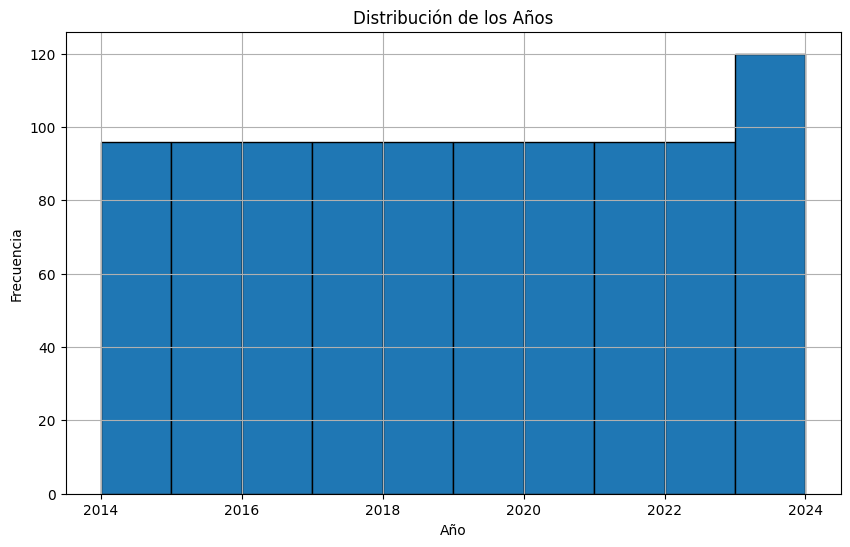

In [58]:
# Histograma del Año
plt.figure(figsize=(10, 6))
plt.hist(hogares['Año'], bins=range(int(hogares['Año'].min()), int(hogares['Año'].max()) + 1), edgecolor='black')
plt.title('Distribución de los Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Distribución de Accesos

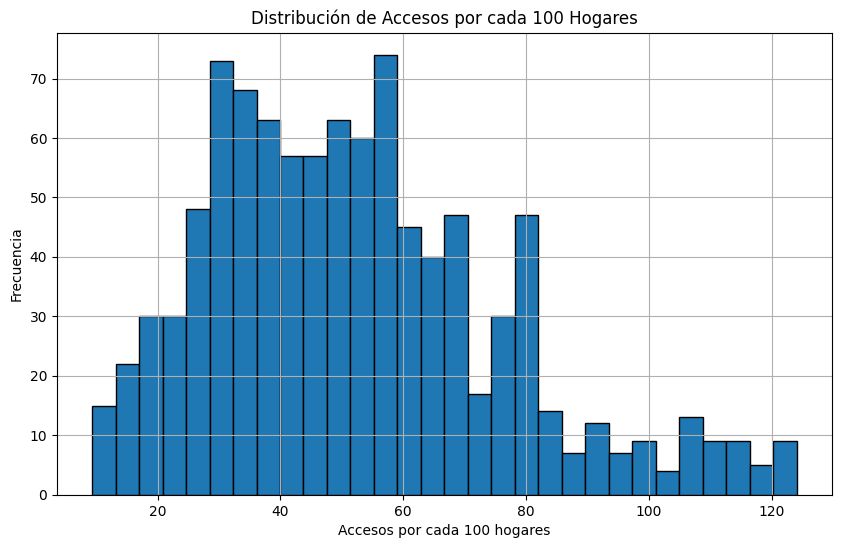

In [59]:
# Histograma de Accesos por cada 100 hogares
plt.figure(figsize=(10, 6))
plt.hist(hogares['Accesos por cada 100 hogares'], bins=30, edgecolor='black')
plt.title('Distribución de Accesos por cada 100 Hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Boxplot del Año

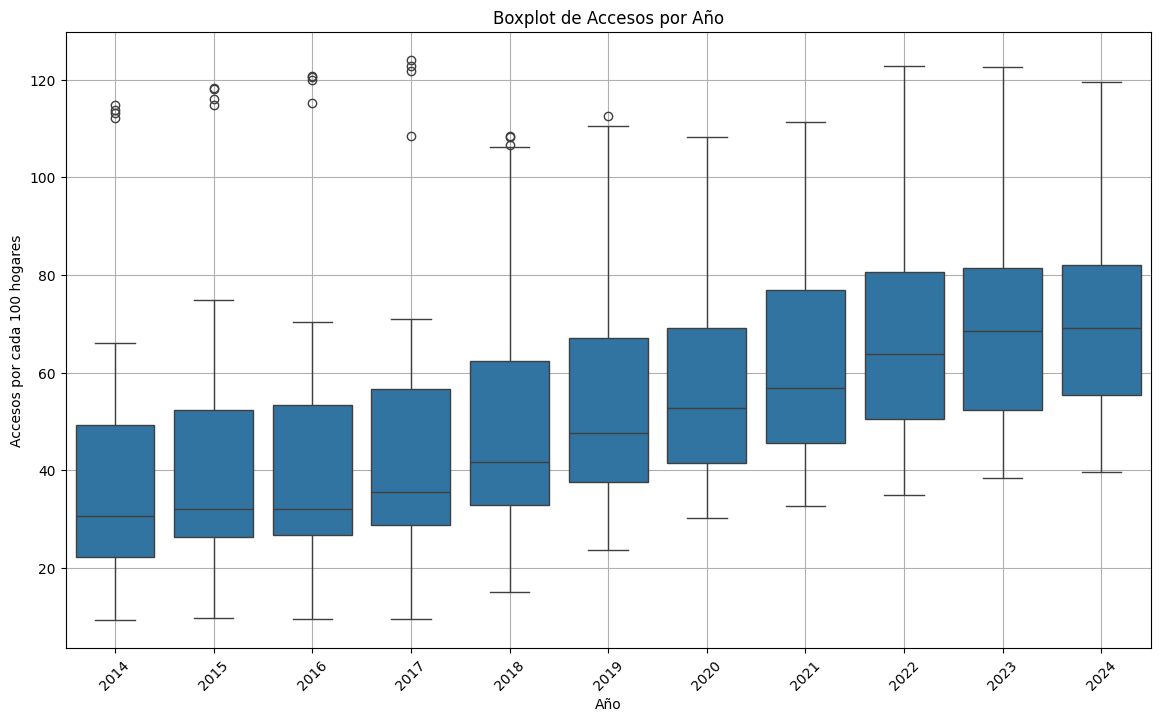

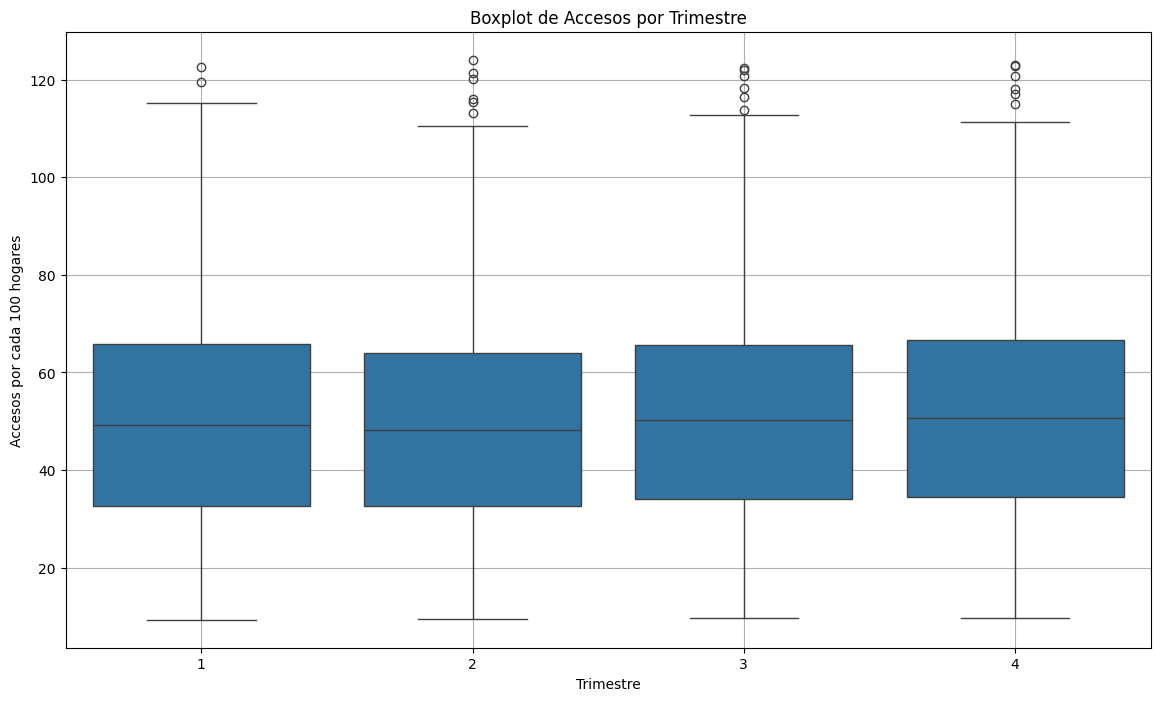

In [60]:
# Boxplot de Accesos por Año
plt.figure(figsize=(14, 8))
sns.boxplot(x='Año', y='Accesos por cada 100 hogares', data=hogares)
plt.title('Boxplot de Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Boxplot de Accesos por Trimestre
plt.figure(figsize=(14, 8))
sns.boxplot(x='Trimestre', y='Accesos por cada 100 hogares', data=hogares)
plt.title('Boxplot de Accesos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()


In [63]:
# Calcular el IQR y detectar valores atípicos por Año
def detectar_atipicos(df):
    Q1 = df['Accesos por cada 100 hogares'].quantile(0.25)
    Q3 = df['Accesos por cada 100 hogares'].quantile(0.75)
    IQR = Q3 - Q1
    atipicos = df[(df['Accesos por cada 100 hogares'] < (Q1 - 1.5 * IQR)) | 
                  (df['Accesos por cada 100 hogares'] > (Q3 + 1.5 * IQR))]
    return atipicos

atipicos_por_ano = hogares.groupby('Año').apply(detectar_atipicos)
print(atipicos_por_ano)


           Año  Trimestre        Provincia  Accesos por cada 100 hogares
Año                                                                     
2014 889  2014          4  Capital Federal                        114.90
     913  2014          3  Capital Federal                        113.80
     937  2014          2  Capital Federal                        113.14
     961  2014          1  Capital Federal                        112.25
2015 793  2015          4  Capital Federal                        118.13
     817  2015          3  Capital Federal                        118.29
     841  2015          2  Capital Federal                        116.07
     865  2015          1  Capital Federal                        114.90
2016 697  2016          4  Capital Federal                        120.63
     721  2016          3  Capital Federal                        120.77
     745  2016          2  Capital Federal                        120.04
     769  2016          1  Capital Federal         

Se observa una tendencia general de aumento en los accesos hasta 2017, seguida de una disminución en 2018 y una leve recuperación en 2019. se deberian Explorar las razones detrás de la disminución en 2018 y si hay factores externos que influyeron en estos cambios.

5. Velocidad % por prov

In [66]:
# Importar las hoja Velocidad % por provincia 
velocidad = pd.read_csv('Dataset_procesados/Velocidad % por prov.csv')

In [67]:
print(velocidad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB
None


In [68]:
print(velocidad.describe())

               Año   Trimestre  Mbps (Media de bajada)
count   984.000000  984.000000              984.000000
mean   2018.634146    2.463415               23.186898
std       2.962686    1.128870               31.623977
min    2014.000000    1.000000                2.573729
25%    2016.000000    1.000000                4.762379
50%    2019.000000    2.000000                9.307228
75%    2021.000000    3.000000               27.636730
max    2024.000000    4.000000              234.440000


Crecimiento y Variabilidad: El análisis sugiere que, a lo largo de los años, la velocidad de internet ha mejorado, pero sigue habiendo una gran variabilidad. Es posible que algunas provincias tengan acceso a velocidades mucho mayores que otras, lo que puede reflejar diferencias en infraestructura o inversión.

Año: El rango de años va de 2014 a 2024, con una media de 2018.63. La desviación estándar es de aproximadamente 2.96 años, lo que indica una variación regular en los años registrados.
Trimestre: Los trimestres están distribuidos de 1 a 4, con una media de 2.46 y una desviación estándar de 1.13, lo que sugiere que los datos están bien distribuidos a lo largo de los trimestres del año.
Mbps (Media de bajada):

Media: La media de velocidad de descarga es de 23.19 Mbps, lo que sugiere un nivel de conectividad aceptable en promedio a lo largo de los años.



Boxplot de Velocidad por Año y Trimestre:

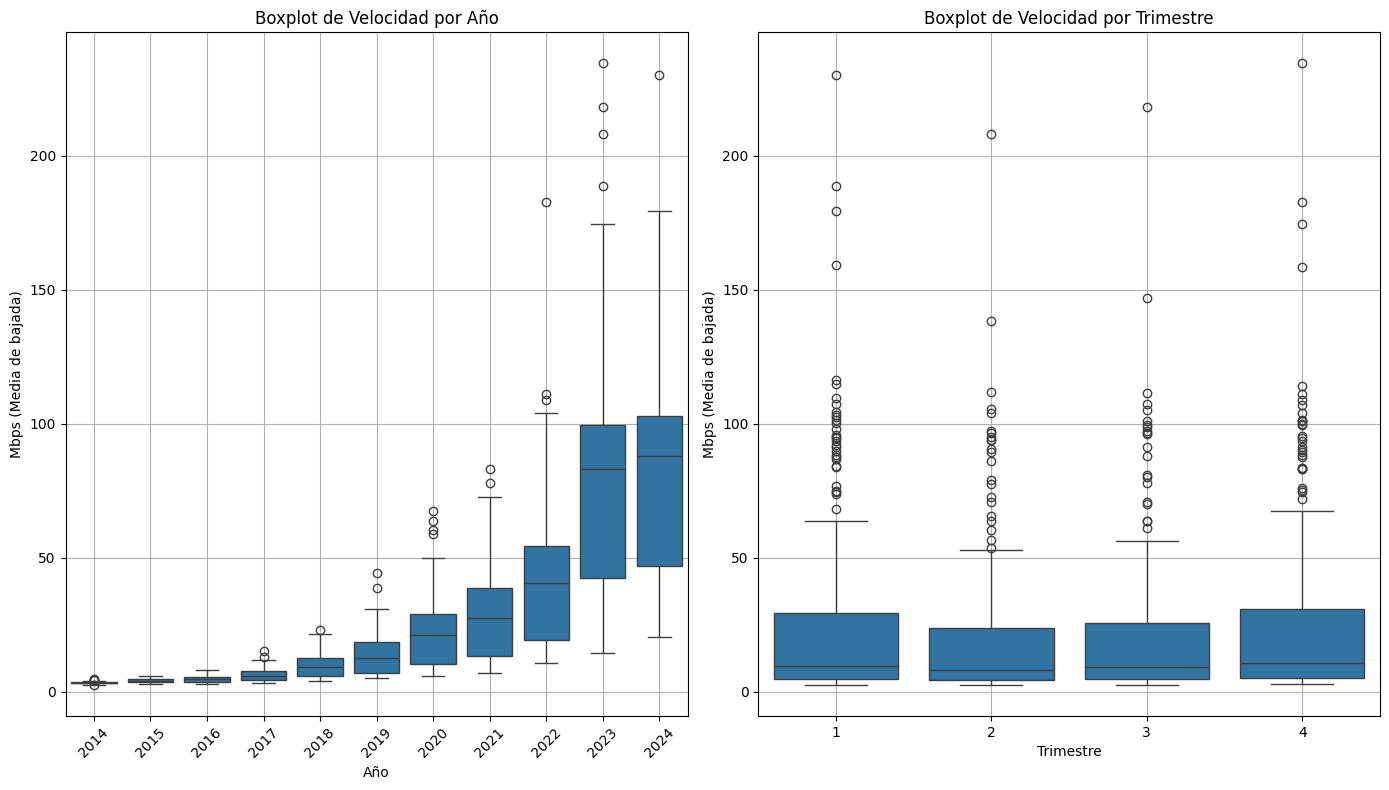

In [70]:
plt.figure(figsize=(14, 8))

# Boxplot para Año
plt.subplot(1, 2, 1)
sns.boxplot(x='Año', y='Mbps (Media de bajada)', data=velocidad)
plt.title('Boxplot de Velocidad por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.xticks(rotation=45)

# Boxplot para Trimestre
plt.subplot(1, 2, 2)
sns.boxplot(x='Trimestre', y='Mbps (Media de bajada)', data=velocidad)
plt.title('Boxplot de Velocidad por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)

plt.tight_layout()
plt.show()

La gráfica por AÑo muestra la velocidad de descarga de internet (Mbps) a lo largo de los años, desde 2014 hasta 2024. Se puede observar un claro aumento en la velocidad media a lo largo de los años.

La gráfica por trimestre muestra la velocidad de descarga de internet (Mbps). No se observa una diferencia significativa entre los trimestres.

Histograma de Velocidad de Internet:

Propósito: Evaluar la distribución general de las velocidades de internet.

Interpretación: Detectar si hay sesgo en la distribución (por ejemplo, más concentraciones de velocidades bajas o altas).

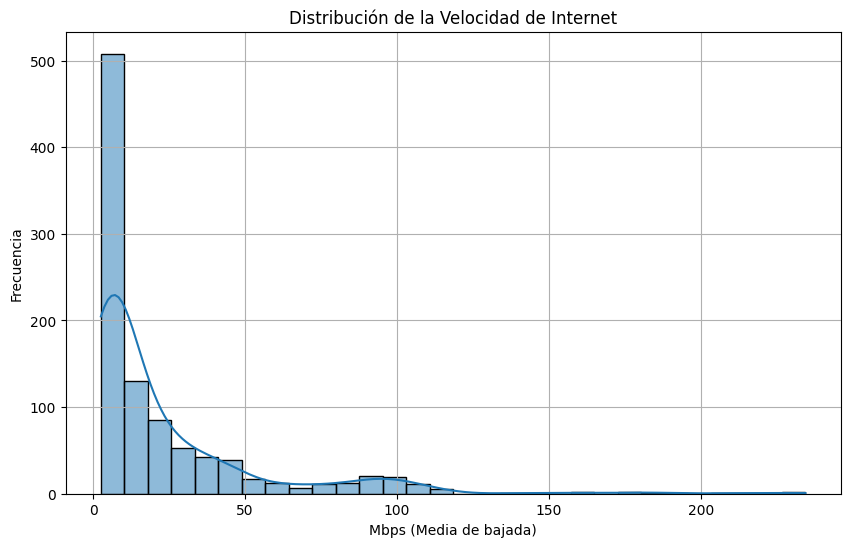

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(velocidad['Mbps (Media de bajada)'], kde=True, bins=30)
plt.title('Distribución de la Velocidad de Internet')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


La distribución de velocidades de descarga está sesgada a la derecha, con la mayoría de las conexiones agrupadas en el rango de velocidades más bajas.
Hay una larga cola a la derecha, lo que indica la presencia de algunas conexiones con velocidades mucho más altas que la media.


8. Ingresos

In [72]:
# Importar las hoja Acc_vel_loc_sinrangos
ingresos = pd.read_csv('Dataset_procesados/Ingresos.csv')

In [73]:
print(ingresos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB
None


In [74]:
print(ingresos.describe())

               Año  Trimestre  Ingresos (miles de pesos)
count    41.000000  41.000000               4.100000e+01
mean   2018.878049   2.463415               3.885074e+07
std       3.689140   1.142313               5.422892e+07
min    2014.000000   1.000000               2.984054e+06
25%    2016.000000   1.000000               6.912442e+06
50%    2019.000000   2.000000               2.020741e+07
75%    2021.000000   3.000000               4.299994e+07
max    2033.000000   4.000000               2.804191e+08


Resumen de Datos
Promedio de Ingresos Anuales: Los ingresos promedio son 38,850 millones de pesos.
Distribución Temporal:
Año Mínimo y Máximo: Los datos cubren desde 2014 hasta 2023, lo que indica proyecciones o datos erróneos en el futuro.
Ingresos Máximos y Mínimos: El valor máximo es 280,419 millones de pesos y el mínimo es 2,984 millones de pesos.
Variabilidad en los Ingresos: La desviación estándar es alta, lo que indica una gran variabilidad en los ingresos entre los distintos trimestres.


Gráfico de Líneas (Tendencia de Ingresos a lo Largo del Tiempo)

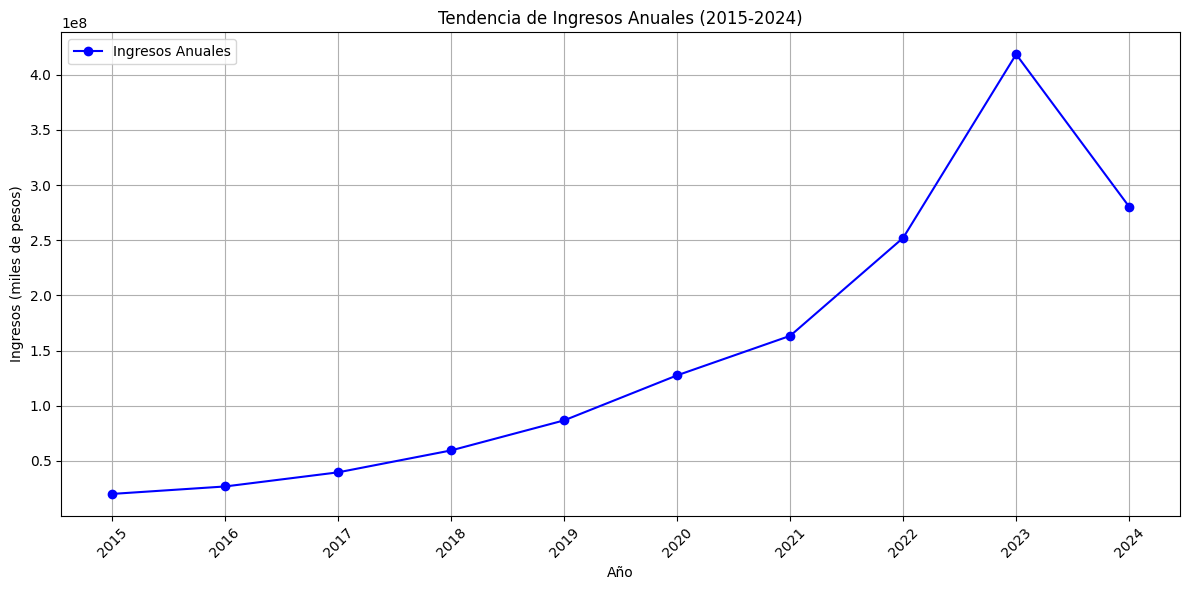

In [79]:


# Filtrar los datos para incluir solo los años entre 2015 y 2024
df_filtered = ingresos[(ingresos['Año'] >= 2015) & (ingresos['Año'] <= 2024)]

# Agrupar los ingresos por año y sumar los ingresos de cada año
df_anual = df_filtered.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Configurar el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_anual['Año'].astype(str), df_anual['Ingresos (miles de pesos)'], marker='o', linestyle='-', color='b', label='Ingresos Anuales')

# Mejorar la legibilidad de las etiquetas del eje x
plt.xticks(rotation=45)

# Añadir título y etiquetas de ejes
plt.title('Tendencia de Ingresos Anuales (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')

# Añadir una cuadrícula y una leyenda
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


 Esta gráfica sugiere un aumento constante en los ingresos a lo largo del tiempo

Distribucion de Ingresos

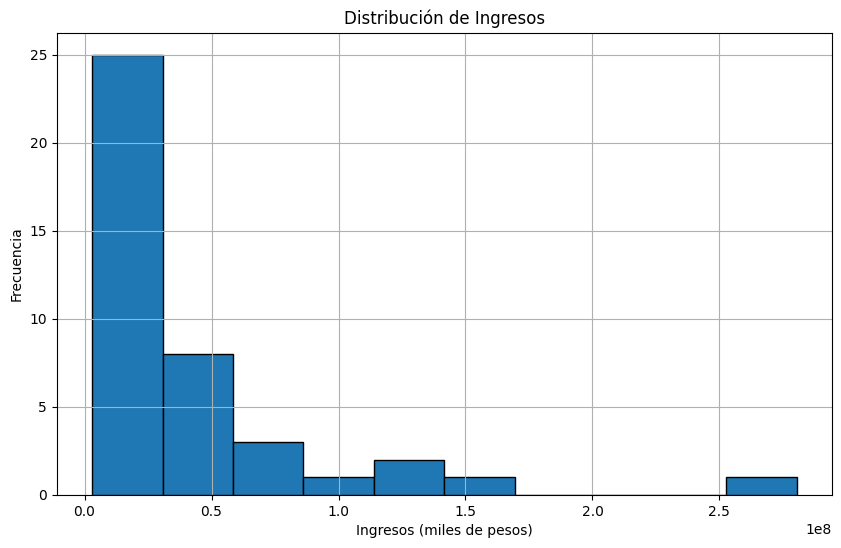

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ingresos (miles de pesos)'], bins=10, edgecolor='black')
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La mayoría de las observaciones se concentran en el rango inferior de ingresos, con una cola a la derecha. Esto indica una distribución del ingreso desigual, donde una pequeña proporción de la población tiene ingresos significativamente más altos que la mayoría.

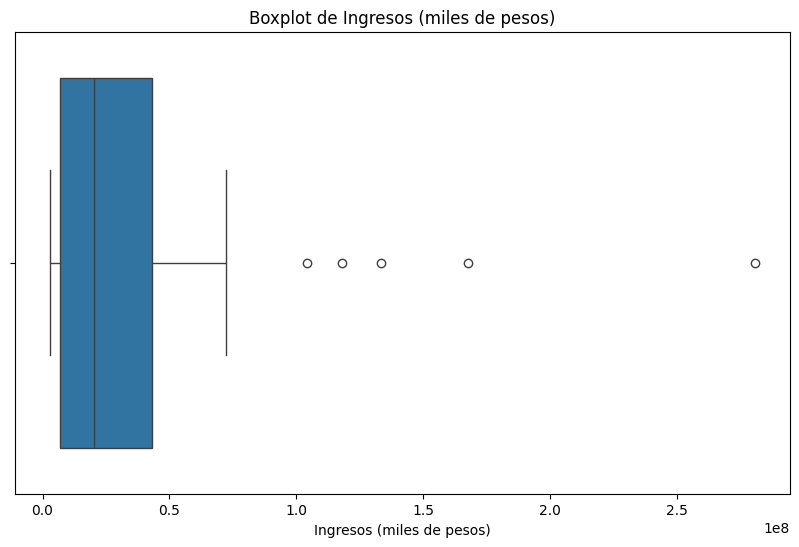

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ingresos (miles de pesos)'])
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.xlabel('Ingresos (miles de pesos)')
plt.show()

el boxplot sugiere una distribución de ingresos altamente asimétrica hacia la derecha, con la mayoría de los individuos concentrándose en un rango de ingresos bajos y una minoría con ingresos considerablemente más altos.